# Midterm Project

#### Github link: https://github.com/mohithashok/Programming_For_Datascience_Coursework

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set(style='ticks', palette='BrBG')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, append=1)

## Reading the Data
Import the data from mpg.csv file into a pandas dataframe called auto_data

In [3]:
auto_data = pd.read_csv('mpg.csv')

## Exploring the data

In [4]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto_data.shape

(398, 9)

In [6]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 24.9+ KB


In [7]:
auto_data.groupby(['cylinders']).mpg.describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,20.550000,2.564501,18.0,18.75,20.25,22.05,23.7
4,204.0,29.286765,5.710156,18.0,25.00,28.25,33.00,46.6
5,3.0,27.366667,8.228204,20.3,22.85,25.40,30.90,36.4
6,84.0,19.985714,3.807322,15.0,18.00,19.00,21.00,38.0
8,103.0,14.963107,2.836284,9.0,13.00,14.00,16.00,26.6


In [8]:
auto_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### The horsepower feature is considered as an object since there is a special character in the data. 

In [9]:
auto_data[auto_data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


### Selecting the numerical fields for the analysis (droping 'name' feature)

In [10]:
del auto_data["name"]

In [11]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### Dealing with Special Characters

In [12]:
# Dropping the non-numeric rows in the data
auto_data = auto_data[pd.to_numeric(auto_data['horsepower'], errors='coerce').notnull()]

In [13]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null object
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 26.0+ KB


In [14]:
# Converting the horsepower field to numeric datatype
auto_data = auto_data.convert_objects(convert_numeric=True)

In [15]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


## Exploring the data using Visualizations

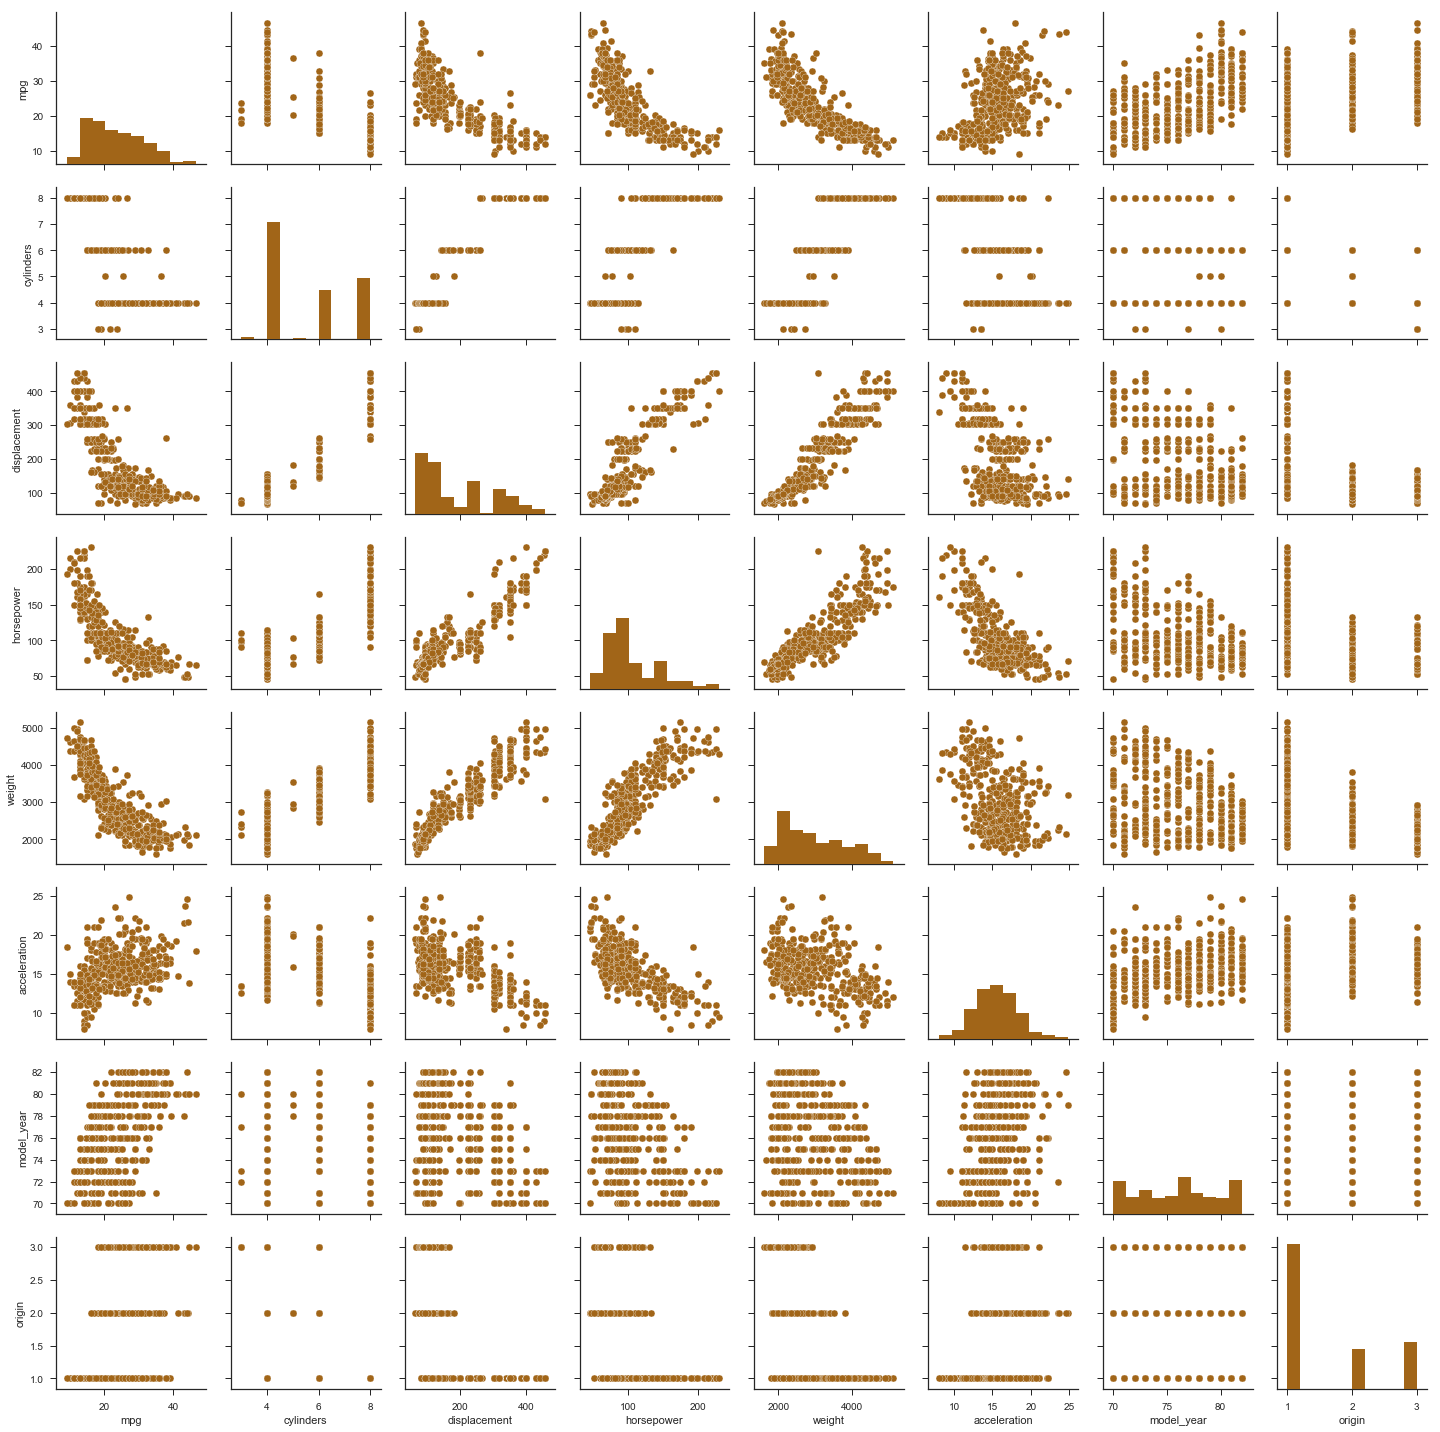

In [16]:
# Using a pairplot to explore relationships across the entire database
sns.pairplot(auto_data)

Text(0.5,1,'MPG Distribution')

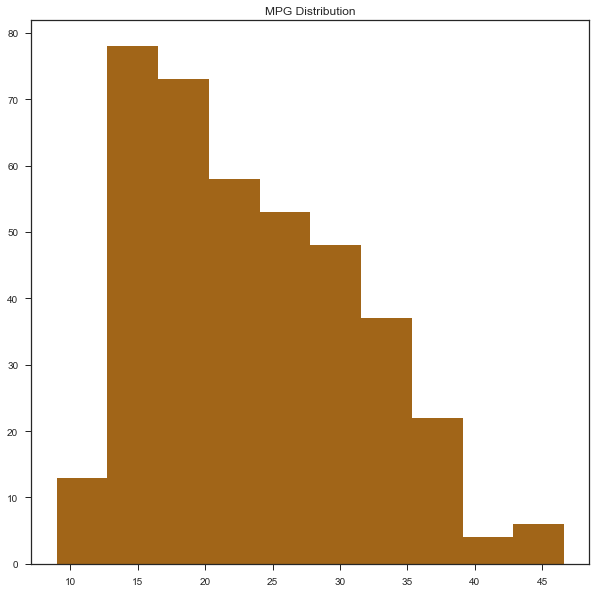

In [17]:
# Using histogram to understand the distribution of the target variable 'mpg'
plt.figure(figsize=(10,10))
plt.hist(auto_data["mpg"])
plt.title("MPG Distribution")

Text(0.5,0.98,'MPG Vs Displacement')

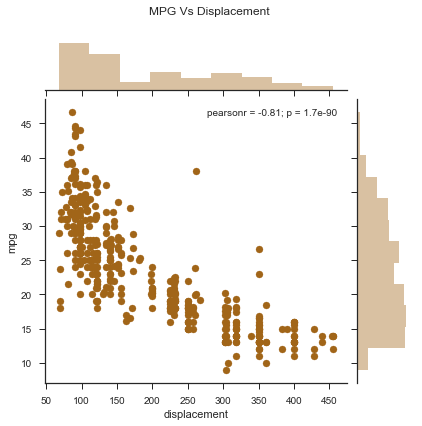

In [18]:
# Jointplot to explore the relation between mpg and displacement
g = sns.jointplot(x='displacement',y='mpg',data=auto_data)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('MPG Vs Displacement')

Text(0.5,0.98,'MPG Vs Horsepower')

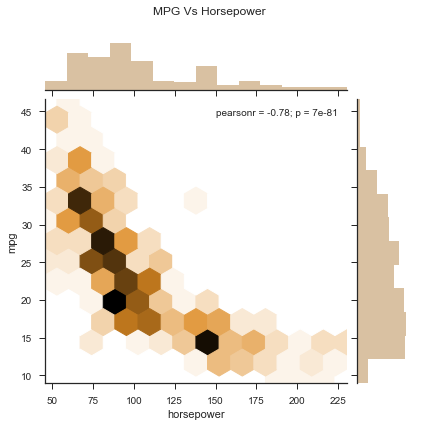

In [19]:
# Jointplot to explore the relation between mpg and horsepower
g = sns.jointplot(x='horsepower',y='mpg',kind='hex',data=auto_data)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('MPG Vs Horsepower')

Text(0.5,0.98,'MPG Vs Weight')

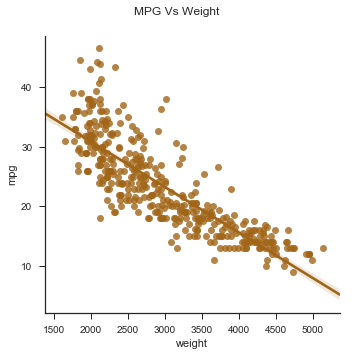

In [20]:
# Linear model plot to explore the relation between mpg and weight
g = sns.lmplot(x='weight',y='mpg',data=auto_data)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('MPG Vs Weight')

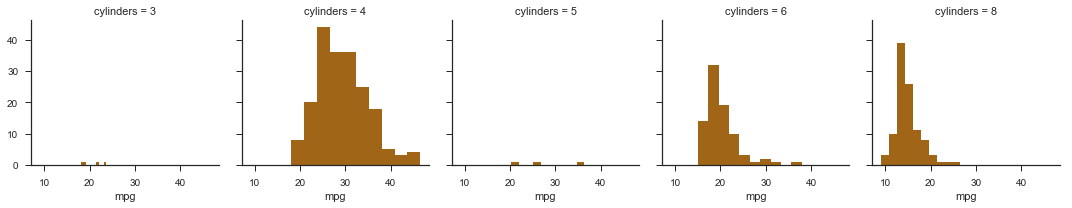

In [21]:
# Facet grid to visualize the data for varying values of cylinder
g = sns.FacetGrid(auto_data, col="cylinders")
g.map(plt.hist, "mpg");

## Setting the Target variable and the Required numerical features

In [22]:
#one hot encoding the origin variable
dummy=pd.get_dummies(auto_data['origin'],columns='origin',prefix='origin')
auto_data=pd.concat([auto_data,dummy],axis=1)
auto_data=auto_data.drop(['origin'],axis=1)

In [23]:
# Setting X equal to the numerical features (the ones that have an effect on mpg) and y equal to 'mpg'
y = auto_data['mpg']
X = auto_data.drop(['mpg'], axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,8,307.0,130,3504,12.0,70,1,0,0
1,8,350.0,165,3693,11.5,70,1,0,0
2,8,318.0,150,3436,11.0,70,1,0,0
3,8,304.0,150,3433,12.0,70,1,0,0
4,8,302.0,140,3449,10.5,70,1,0,0


## Splitting the Data into Test and Train

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

#### Using the MinMaxScaler to scale the data since it maintains the structure of the data while bringing the features to the same scale

## Linear Regression

#### Creating an instance of the Linear Regression model

In [25]:
lm = LinearRegression()

#### Training the lm object on the training set

In [26]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Exploring the coefficients

In [27]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.2433489   0.02394557  0.00235333 -0.00777683  0.23652527  0.85508785
 -1.7636912   1.22782068  0.53587052]


In [28]:
coef = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coef.columns = ['Column Name', 'Coefficients']
coef.sort_values('Coefficients')

coef['sort'] = coef['Coefficients'].abs()
coef.sort_values(['sort'], ascending=[False])

,Column Name,Coefficients,sort
6,origin_1,-1.763691,1.763691
7,origin_2,1.227821,1.227821
5,model_year,0.855088,0.855088
8,origin_3,0.535871,0.535871
0,cylinders,-0.243349,0.243349
4,acceleration,0.236525,0.236525
1,displacement,0.023946,0.023946
3,weight,-0.007777,0.007777
2,horsepower,0.002353,0.002353


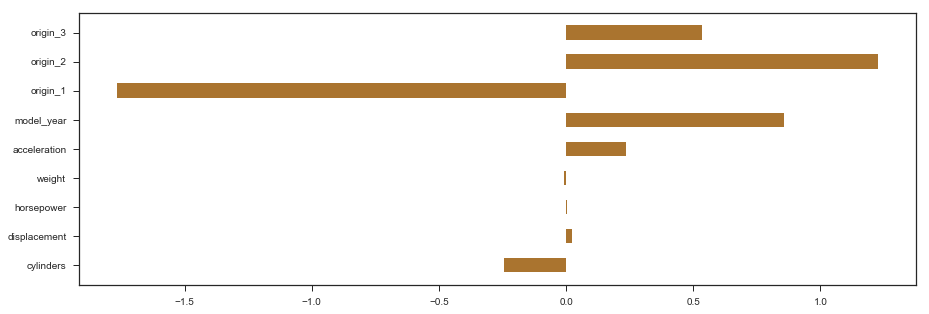

In [29]:
# Plotting the coefficients
index = np.arange(len(coef))
fig = plt.figure(figsize=(15,5))
bar_width = 0.5
rects = plt.barh(index , coef["Coefficients"], bar_width, alpha=0.9, label='Main')
plt.yticks(index, coef["Column Name"])
plt.show()

#### Predicting the Test set

In [30]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

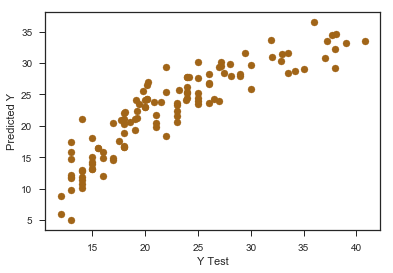

In [31]:
# Scatter plot to visualize the Prediction vs Real values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Evaluating the model

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.6542542076201037
MSE: 10.746612615872555
RMSE: 3.2782026502143755


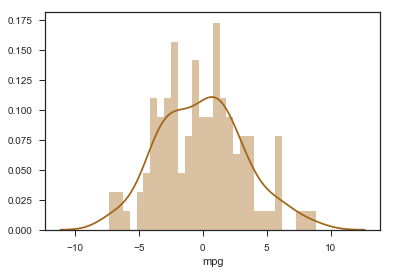

In [33]:
# Plotting a distplot with the residuals
sns.distplot((y_test-predictions),bins=30);

In [34]:
# Printing the Regression score

print(lm.score(X_train , y_train))
print(lm.score(X_test , y_test))

0.8292945350352464
0.7918948201473375


In [35]:
# Using Cross validation to get a more reliable score (validation score)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lm, X_train, y_train, cv = 5)
print("Cross Validation Scores: " + str(scores))
print("Mean Cross Validation Score: " + str(scores.mean()))

Cross Validation Scores: [0.85178051 0.81729699 0.80029685 0.8509436  0.76159648]
Mean Cross Validation Score: 0.8163828858304525


#### The model explains 81.6% of the variablity of the response data around its mean